<a href="https://colab.research.google.com/github/shauryaprataps/cricket_career_runs_predictor/blob/main/my_cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#My-cricket

##Load Data

In [1]:
import pandas as pd
df=pd.read_csv('odb.csv')
df

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195
1,1,V Kohli (INDIA),2008-2021,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125
2,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162
3,3,RG Sharma (INDIA),2007-2021,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244
4,4,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,SK Raina (INDIA),2005-2018,226,194,35,5615,116*,35.31,6005,93.50,5,36,14,476,120
115,115,H Masakadza (ZIM),2001-2019,209,208,4,5658,178*,27.73,7728,73.21,5,34,15,585,86
116,116,RB Richardson (WI),1983-1996,224,217,30,6248,122,33.41,9801,63.74,5,44,8,541+,54+
117,117,BB McCullum (NZ),2002-2016,260,228,28,6083,166,30.41,6312,96.37,5,32,20,577,200


##Data Preparation

In [2]:
y=df['Runs']
y

,Runs
0,18426
1,12169
2,13704
3,9205
4,13430
...,...
114,5615
115,5658
116,6248
117,6083


In [19]:
x=df[['Mat','Inns','NO','BF']]
x

,Mat,Inns,NO,BF
0,463,452,41,21368
1,254,245,39,13061
2,375,365,39,17046
3,227,220,32,10354
4,445,433,18,14725
...,...,...,...,...
114,226,194,35,6005
115,209,208,4,7728
116,224,217,30,9801
117,260,228,28,6312


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [21]:
x_train

,Mat,Inns,NO,BF
44,147,143,11,6144
12,248,240,16,9721
15,448,418,39,16020
70,233,218,41,11014
108,143,138,11,5407
...,...,...,...,...
106,137,118,35,3339
14,299,289,32,13086
92,198,161,33,5504
51,83,78,10,4813


In [22]:
x_test

,Mat,Inns,NO,BF
56,350,297,84,12303
89,107,102,5,3328
4,445,433,18,14725
45,187,167,24,7451
26,287,279,11,9922
117,260,228,28,6312
69,227,213,36,8325
10,330,303,41,11933
90,127,126,8,5195
73,46,46,5,2519


## Model Building

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)


In [25]:
print(y_train)
print(y_lr_train_pred)

44      5238
12      8094
15     12650
70      7381
108     3675
       ...  
106     3367
14     10405
92      5088
51      3599
102     2824
Name: Runs, Length: 95, dtype: int64
[ 4892.94943797  7773.6184017  12881.38483657  8206.10541579
  4478.21408883  6284.72901217  2432.48734085  4409.66736002
  4132.31251257  6948.01923475  7954.48611418  3343.04388882
  5261.04670038  8850.2058931  11185.39345998  8337.92799817
  5353.26891024  4960.32804653  6979.02771201  7025.39151837
  2204.62589383  6772.73488571  3584.6160305   2868.15569121
 11319.4364117   9454.38061454  7053.77442087  4459.29947817
  7714.90392109  5544.09100148  2902.22518461  9540.89959367
  4881.79400205  5794.69372923  6265.81387771  7258.76925419
  5036.17389918  7112.46795006  3624.83630136  7504.93236936
 13414.34974217  8465.21979601  2034.30724884  7946.70379389
  8367.88581177  4873.16035548  4694.49987114  7536.2244652
  2737.70280709  3315.05018001  6109.20067131  6216.03207261
  9346.57403872  5564.222072

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)
lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

lr_results=pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,476088.811371,0.9427,591864.7249,0.956812


#### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [28]:
y_rf_train_pred=rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)


In [29]:
from sklearn.metrics import mean_squared_error,r2_score
rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)
rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)

rf_results=pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,532404.717111,0.935922,2589533.899193,0.811043


In [30]:
df_models=pd.concat([lr_results,rf_results],axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,476088.811371,0.9427,591864.7249,0.956812
1,Random Forest,532404.717111,0.935922,2589533.899193,0.811043


[]

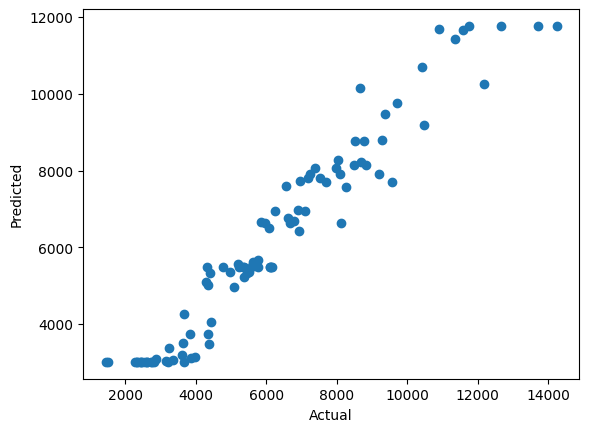

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_rf_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot()


# Predict Runs



In [34]:
new_data = pd.DataFrame({
    'Mat': [27],
    'Inns': [22],
    'NO': [2] ,
    'BF': [550]
})

predicted_runs_lr = lr.predict(new_data)
print(f"Predicted Runs (Linear Regression): {predicted_runs_lr[0]:.0f}")


Predicted Runs (Linear Regression): 689


In [35]:
predicted_runs_rf = rf.predict(new_data)
print(f"Predicted Runs (Random Forest): {predicted_runs_rf[0]:.0f}")

Predicted Runs (Random Forest): 3010
